<a href="https://colab.research.google.com/github/Harshini-2k5/dl/blob/main/mutliclassdlexp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Dropout
(x_train,y_train),(x_test,y_test)=reuters.load_data(num_words=10000)
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train=vectorize_sequences(x_train)
x_test=vectorize_sequences(x_test)
num_classes=np.max(y_train)+1
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)
model=Sequential()
model.add(Dense(64,activation='relu',input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history=model.fit(x_train,y_train,epochs=20,batch_size=512,validation_split=0.2)
test_los,test_acc=model.evaluate(x_test,y_test)
print('test accuracy:',test_acc)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.2296 - loss: 3.4061 - val_accuracy: 0.5214 - val_loss: 2.1878
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.4773 - loss: 2.2462 - val_accuracy: 0.5910 - val_loss: 1.6997
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.5515 - loss: 1.8453 - val_accuracy: 0.6394 - val_loss: 1.5065
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6005 - loss: 1.6395 - val_accuracy: 0.6739 - val_loss: 1.3771
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6250 - loss: 1.5350 - val_accuracy: 0.6934 - val_loss: 1.2931
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.6658 - loss: 1.3943 - val_accuracy: 0.7040 - val_loss: 1.2369
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.6828 - loss: 1.3045 - val_accuracy: 0.7162 - val_loss: 1.2002
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.6976 - loss: 1.2377 - val_accuracy: 0.7190

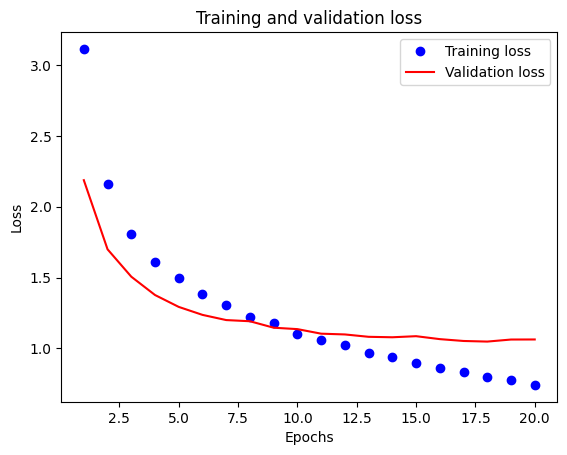

In [ ]:
import matplotlib.pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


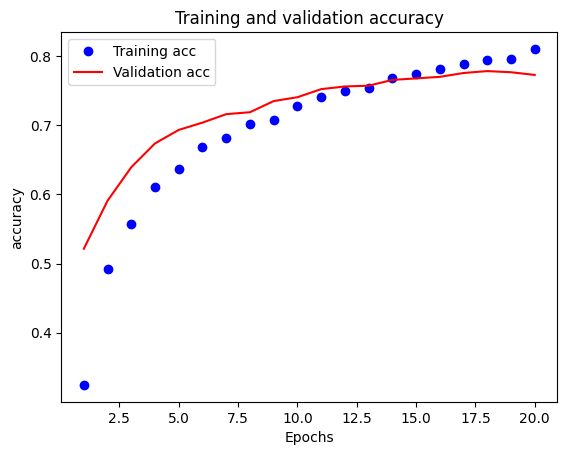

In [10]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_test_classes=np.argmax(y_test,axis=1)
cm=confusion_matrix(y_test_classes,y_pred_classes)
print("confusion matrix:\n",cm)
print(classification_report(y_test_classes,y_pred_classes))



71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
confusion matrix:
 [[ 6  1  0 ...  0  0  0]
 [ 0 90  0 ...  0  0  0]
 [ 0  3  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.57      0.86      0.68       105
           2       0.82      0.45      0.58        20
           3       0.88      0.95      0.91       813
           4       0.86      0.87      0.87       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.68      0.66      0.67        38
           9       0.62      0.72      0.67        25
          10       0.88      0.77      0.82        30
          11       0.50      0.82      0.62        83
          12       0.00      0.00      0.00        13
          13       0.50     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
